## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression and classification are both types of supervised learning but have different purposes. Regression is used to predict continuous numerical values, such as house prices or stock prices, based on the input variables. In contrast, classification is used to predict discrete categories or class labels, such as determining whether an email is spam or not. While regression outputs a continuous value, classification assigns an observation to a specific category. The performance of regression models is typically measured using metrics like Mean Squared Error, wheareas classification models are evaluated using metrics such as accuracy, precision, recall, and F-1 score.

2. A confusion table is a table that summarizes the performance of a classification model by comparing the actual and predicted class labels. It consists of four key components: true positives, false positives, false negatives, and true negatives. This matrix helps us understand how well a model distinguishes between different classes. The confusion matrix allows us to calculate important metrics such as precision, recall, and F-1 score.

3. The SSE quantifies the total squared differences between the actual and predicted values in a regression model. It measures how well the model's predictions align with the observed data. A lower SSE indicates that the model's predictions are closer to the actual values, suggesting a better fit. Conversely, a higher SSE suggests that the model does not capture the patterns in the data effectively. While SEE is useful for comparing models, it does not account for model complexity, meaning a model with too many parameters may have a low SSE but still be overfitting the training data.

4. Overfitting occurs when a model learns not only the underlying pattern in the training data but also noise and random fluctuations, resulting in poor generalization to new data. An overfitted model has high accuracy on the training set but performs poorly on unseen data due to excessive complexity. Underfitting happens when a model is too simple and it fails to capture the underlying relationships in the data, leading to poor performance on both the training and test sets. To address these issues, techniques such as regularization, increasing the amount of training data, and selecting an optimal model complexity using cross-validation can be used to find a balance between bias and variance.

5. Splitting the date into training and testing sets ensures that a model is evaluated on data it has never seen before, which helps in assessing its generalization ability. The training set is used to develop the model, while the test set is used to evaluate its performance. Choosing an optimal parameter k, such as the number of neighbors in k-nearest neighbors(KNN) or the complexity of a model, by assessing accuracy or SSE on the test set hlpes prevent overfitting. This approach allows us to select a model that performs well not only on the training data but also on unseen data, improving its predictive power in real-world scenarios.

6. When making predictions in classification, we can either report a single class label (hard classification) or provide a probability distribution over class labels (soft classification). Hard classification is simple and interpretable, making it ideal for scenarios where a clear decision is required, such as determining whether an email is spam. However, it does not provide any measure of uncertainty or confidence in the prediction. In contrast, soft classification provides probabilities for each class, allowing for better risk assessment and threshold-based decision making. This is useful in many fields including medical diagnosis, where knowing the probability of a disease can help doctors decide on further testing. The downside of soft classification is that it adds complexity and requires setting probability thresholds, which may introduce additional challenges in decision-making.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("USA_cars_datasets.csv")

In [3]:
# Keep only the relevant columns
df = df[['price', 'year', 'mileage']]

In [4]:
# Check for missing values
na_counts = df.isna().sum()

df_shape = df.shape

In [5]:
# Normalize 'year' and 'mileage' using Min-Max scaling
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

In [6]:
# Split the dataset into training (80%) and test (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# Extract features and target variables
X_train, y_train = train_df[['year', 'mileage']], train_df['price']
X_test, y_test = test_df[['year', 'mileage']], test_df['price']

In [8]:
# Initialize different values of k for kNN regression
k_values = [3, 10, 25, 50, 100, 300]
mse_results = {}

In [9]:
# Create a figure for plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

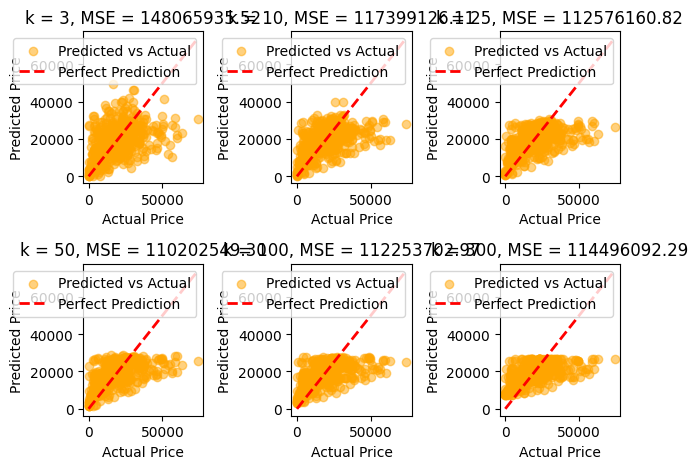

In [10]:
# Train and evaluate kNN for different values of k
for i, k in enumerate(k_values, 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    # Scatter plot of actual vs predicted prices
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5, color='orange', label="Predicted vs Actual")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
    plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Determine optimal k (the one with the lowest MSE)
optimal_k = min(mse_results, key=mse_results.get)

In [12]:
# Display MSE results and dataset information
df_info = {
    "NA Counts": na_counts,
    "Dataset Shape": df_shape,
    "MSE Results": mse_results,
    "Optimal k": optimal_k
}

In [14]:
print("Mean Squared Error Results for Different k Values:")
print(mse_df)

# Print dataset summary
df_info

Mean Squared Error Results for Different k Values:
     k           MSE
0    3  1.480659e+08
1   10  1.173991e+08
2   25  1.125762e+08
3   50  1.102025e+08
4  100  1.122537e+08
5  300  1.144961e+08


{'NA Counts': price      0
 year       0
 mileage    0
 dtype: int64,
 'Dataset Shape': (2499, 3),
 'MSE Results': {3: 148065935.51955554,
  10: 117399126.10604002,
  25: 112576160.82390079,
  50: 110202549.3014296,
  100: 112253702.9700672,
  300: 114496092.28682345},
 'Optimal k': 50}

As the value of k varied in the k-nearest neighbors (kNN) regresstion model, the scatter plots of predicted versus actual prices exhibited clear trends related to overfitting and underfitting.

When k was small, such as k = 3 or k = 10, the model was highly sensitive to individual data points. The predictions varied significantly, with many values deviating from the ideal diagonal line representing perfect predictions. This indicated overfitting, where the model closely followed the training data but failed to generalize well to unseen data. The high variance in predictions resulted in a higher MSE.

As k increased to moderate values, such as k = 25 or k = 50, the model's predictions became more stable. The scatter plots for these values showed that predicted prices aligned more closely with actual prices, reducing the spread of prediction errors. This suggested that the model found a good balance between bias and variance, minimizing MSE and improving its ability to generalize. Among the tested values, k = 50 was optimal, as it produced the lowest MSE.

For larger values of k, such as k = 100 and k = 300, the model became too simplistic. INstead of capturing the true relationship between year, mileage, and price, it averaged across too many neighboring points, leading to underfitting. The scatter plots for these values showed that predictions clustered around an average price, failing to capture variations in actual prices. This smoothing effect reduced variance but increased bias, causing MSE to rise again.

In summary, small values of k resulted in overfitting, where the model was too sensitive to individual data points. Large values of k led to underfitting, where the model became too simplistic and failed to capture important price variations. The best-performing model was found at k = 50, where the predictions were the most accurate, minimizing MSE and striking an effective balance between bias and variance.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.